In [308]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from skimage import feature
from skimage.feature import blob_dog, blob_log, blob_doh
from collections import Counter, defaultdict
import os
import time

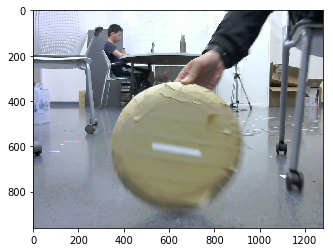

In [309]:
img = cv2.imread('./data/center_away/run_50.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [310]:
def basic_transform(img):
    lower_brown = (136, 133, 101)
    upper_brown = (186, 182, 138)
    mask = cv2.inRange(img, lower_brown, upper_brown)
    result = cv2.bitwise_and(img, img, mask=mask)
    return result

def edge_transform(img):
    # background to black
#     thresh, ret = cv2.threshold(img,0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    thresh, ret = cv2.threshold(img,165, 255, cv2.THRESH_BINARY_INV)
    # get edges
    canny = cv2.Canny(ret, 60, 180)
    # make them thicker
    kernel = np.ones((3,3),np.uint8)
    canny = cv2.morphologyEx(canny, cv2.MORPH_DILATE, kernel)
    # apply edges as border in the image
    img[canny==255] = 0

    # same as before
    amount, labels = cv2.connectedComponents(img)
    preview = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
#     print (amount)

    # color them randomly
    for i in range(1, amount):
        preview[labels == i] = np.random.randint(0,255, size=3, dtype=np.uint8)

    return preview



In [311]:
# import the necessary packages
import numpy as np
import cv2

def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0

    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
            color.astype("uint8").tolist(), -1)
        startX = endX
    # return the bar chart
    return bar

def centroid_histogram(labels):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(labels)) + 1)
    (hist, _) = np.histogram(labels, bins = numLabels)
 
    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()
 
    # return the histogram
    return hist

gm = GaussianMixture(n_components=10, covariance_type='full')
    
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

params.filterByColor = False
params.filterByArea = False
params.filterByCircularity = False
params.filterByInertia = False
params.filterByConvexity = False

# Change thresholds
params.minThreshold = 250
params.maxThreshold = 260
params.thresholdStep = 1

# params.filterByInertia = False
# params.filterByConvexity = False

# # Filter by Area.
params.filterByArea = True
params.minArea = 50000
params.maxArea = 1000000
# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
    detector = cv2.SimpleBlobDetector(params)
else : 
    detector = cv2.SimpleBlobDetector_create(params)

def color_segmentation(img, num_clusters, lower_brown, upper_brown, covar_type='full'):
    np.set_printoptions(threshold=np.nan)
#     img = cv2.resize(img, (img.shape[1] // 2, img.shape[0] // 2))
    start = time.time()

    mask = cv2.inRange(img, lower_brown, upper_brown)
    result = cv2.bitwise_and(img, img, mask=mask)
#     plt.imshow(result)
    result = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
    result[result > 0] = 255
#     result = np.abs(result - 255)
#     result[result == 1] = 255
#     print(result)
    
    plt.imshow (result)
#     print(result)
    keypoints = detector.detect(result)
#     blobs_doh = blob_doh(result, min_sigma=1, max_sigma=50, threshold=.01)
    print(keypoints)
#     print(blobs_doh)
    end = time.time()
    
    print('Blob detection took {:.2f} seconds'.format(end - start))

    im_with_keypoints = cv2.drawKeypoints(result, keypoints, np.array([]), (0,0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)



#     clustered_img = np.empty_like(img)
#     clusters_sizes = defaultdict(int)
#     start = time.time()
#     for r in range(img.shape[0]):
#         for c in range(img.shape[1]):
#             best_cluster = labels[r * img.shape[1] + c]
#             chosen_color = clusters.means_[best_cluster]
#             if chosen_color[0] == only_brown[0] and chosen_color[1] == only_brown[1] and chosen_color[2] == only_brown[2]:
#                 clustered_img[r][c] = clusters.means_[best_cluster]
#             else:
#                 clustered_img[r][c] = 0
#     end = time.time()
    print('Labeling took {:.2f} seconds'.format(end - start))
        
#     print('edges', edges)
    return im_with_keypoints
#     return blobs_doh, img

[<KeyPoint 0x1c309c9ae0>]
Blob detection took 0.04 seconds
Labeling took 0.04 seconds


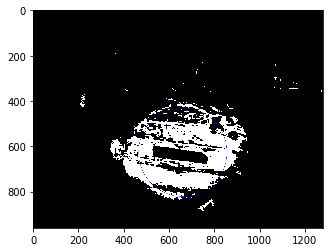

In [318]:
img = cv2.imread("./data/center_away/run_49.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lower_brown = (140, 135, 60)
upper_brown = (160, 150, 120)
clustered_img = color_segmentation(img, 10, lower_brown, upper_brown, 'full')
plt.imshow(clustered_img)
# fig, axes = plt.subplots()

# axes.imshow(new_img, interpolation='nearest')
# for blob in blobs_doh:
#     y, x, r = blob
#     c = plt.Circle((x, y), r, color=(0, 0, 1), linewidth=2, fill=False)
#     axes.add_patch(c)
# axes.set_axis_off()

In [290]:
# plt.subplot(121)
# plt.imshow(img)
# plt.subplot(132)
# plt.imshow(clustered_img)
if clustered_img is not None:
#     plt.subplot(122)
#     print(edge_pts)
    start = time.time()
    r, edge_pts = radius(clustered_img, 100, 200)
    print(f'Radius is {np.sqrt(r)} pixels')
    end = time.time()
    
    new_img = np.zeros_like(img)
    print(new_img.shape)
    for r, c in edge_pts:
        new_img[r][c][:] = brown
    plt.imshow(new_img)

    print('Radius took {:.2f} seconds'.format(end - start))

Radius is 232.22833591101667 pixels
(960, 1280, 3)


NameError: name 'brown' is not defined

Fitting took 38.48
Prediction took 1.01
[211.07204739 222.02713262 245.66583792] 90284
[163.23130979 173.39761408 195.21044231] 135823
[238.91010945 251.44341485 253.1753872 ] 105751
[191.5681541  182.71469269 173.28629365] 49441
[158.35211712 159.47722195 145.41326545] 93781
[136.87553497 143.95814916 161.37334344] 109505
[79.80793485 85.1081142  91.82786087] 102024
[28.23999088 33.48816709 39.96119792] 69808
[108.55319839 117.98823395 135.52441121] 91643
[86.20964402 78.85760992 77.54990509] 40614
[125.8355097  119.53146355  96.16131093] 43996
[139.23798445 138.18243555 111.43595597] 296130


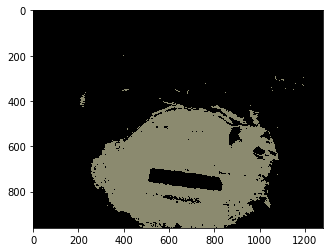

In [56]:
img = cv2.imread("./data/center_away/run_45.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lower_brown = (132, 125, 100)
upper_brown = (142, 140, 115)
clustered_img, labels = color_segmentation(img, 12)
plt.imshow(find_pixels(clustered_img, lower_brown, upper_brown))

Fitting took 51.81
Prediction took 0.82
[237.70537491 250.76705376 253.2212864 ] 94375
[210.08346762 220.65929539 246.75599402] 75953
[185.30081277 193.60833509 204.80000772] 132429
[107.20933532 114.76914243 129.94659754] 198208
[133.73915544 123.43231559 119.20760084] 81090
[ 8.26103798 10.73579098 12.22465879] 21110
[157.19587047 158.09312698 144.79109472] 131539
[135.72476744 133.09163507 108.79812538] 366599
[85.25565789 68.02687066 66.55057383] 50342
[126.99699299 120.89959826  94.67727456] 77155


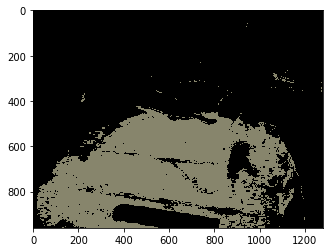

In [57]:
img = cv2.imread("./data/center_away/run_40.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lower_brown = (132, 125, 100)
upper_brown = (142, 140, 115)
clustered_img, labels = color_segmentation(img, 10)
plt.imshow(find_pixels(clustered_img, lower_brown, upper_brown))

Fitting took 66.87
Prediction took 0.89
[169.7200504  167.16331353 162.50763372] 78833
[142.72775716 131.29389348 106.98204089] 31447
[240.45906558 240.02794403 236.94916652] 105081
[250.95626218 253.95626218 251.18996805] 41348
[140.76782184 142.85947515 144.07987199] 196243
[192.93136679 195.43355215 193.08365417] 87426
[152.45702944 157.32792023 156.38552506] 318811
[36.50503242 42.23496436 42.80631287] 111463
[106.53963895 107.63036195 100.97974894] 95655
[170.62378971 172.20367916 175.05257443] 162493
took 69.37 sec


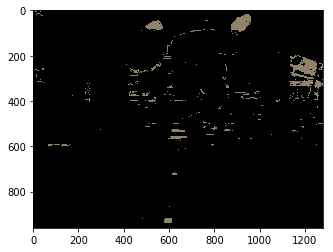

In [58]:
import time
start = time.time()
img = cv2.imread("./data/3d_no_occlusions_twisting_1/run_260.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lower_brown = (117, 125, 100)
upper_brown = (142, 140, 117)
clustered_img, labels = color_segmentation(img, 10)
plt.imshow(find_pixels(clustered_img, lower_brown, upper_brown))
print('took {:.2f} sec'.format(time.time() - start))

[[160.46760886 163.32726878 162.16784381]
 [ 27.70443534  33.51606258  32.63699928]
 [250.94671698 253.94671698 250.94671698]
 [124.30412988 114.03420474  90.19312061]
 [143.08297095 145.95650676 144.20396819]
 [175.60619212 166.81239305 158.16199083]
 [123.17542693 125.7042211  120.83638089]
 [197.84567847 198.37380999 201.57048219]
 [ 60.56145041  80.32747807 138.00293754]
 [156.34774214 146.6845341  105.1942726 ]]


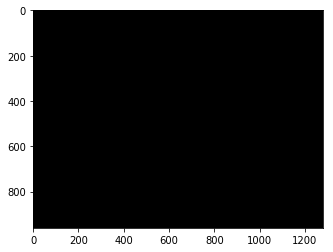

In [51]:
img = cv2.imread("./data/3d_no_occlusions_twisting_1/run_220.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lower_brown = (132, 125, 100)
upper_brown = (142, 140, 115)
clustered_img, labels = color_segmentation(img, 10)
plt.imshow(find_pixels(clustered_img, lower_brown, upper_brown))

In [ ]:
# The first brown's 
# Lower bound: (132, 125, 105)
# Upper bound: (142, 140, 115)
data_root = './data'
for root_dir, dirs, files in os.walk(data_root):
    

center_away, 0 - 114, 109, 93
center_away, 40 - 134, 130, 108
center_away, 49 - 138, 136, 111
3d_no_twisting, 1 - 146, 145, 131
3d_no_twisting, 341 - 169, 152, 120